In [19]:
import numpy as np
import pandas as pd
import talib as ta
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

START_DATE = '2021/1/1'
END_DATE = '2022/1/1'

In [28]:
data = web.DataReader("AAPL", "yahoo")

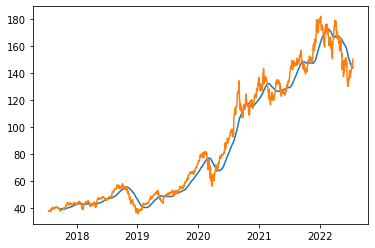

In [41]:
#Simple Moving Average
data['SMA_50'] = ta.SMA(data['Close'], 50)

plt.plot(data['SMA_50'])
plt.plot(data['Close'])
plt.show()

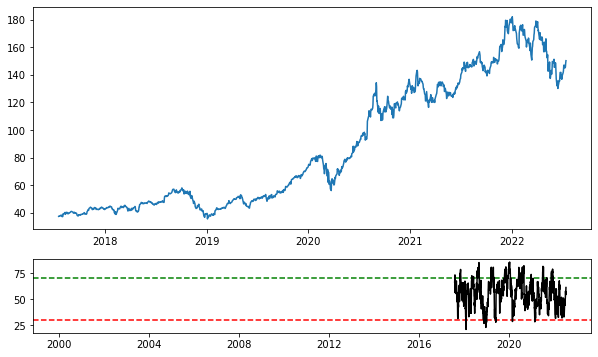

In [79]:
data['RSI'] = ta.RSI(data['Close'])
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize = (10, 6))

axs[0].plot(data['Close'])
axs[1].axhline(y=70, color="green", linestyle="--")
axs[1].axhline(y=30, color="red", linestyle="--")
axs[1].plot(data['RSI'], color="black")
plt.show()

#change start time for second plot!!!

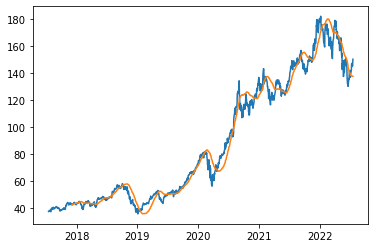

In [84]:
data['LINEARREG'] = ta.LINEARREG(data['Close'], 100)
plt.plot(data['Close'])
plt.plot(data['LINEARREG'])